# Data visualization project



In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import csv
import glob
import scipy.stats as stats
import seaborn as sns
import json
import requests
import folium
import os
from branca.colormap import linear

pd.set_option('display.max_columns', None)

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/FIIT/Vizualizácia dát/Data/final_data/final_data.csv', index_col='datetime')

In [42]:
data.head()

,city,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,country,latitude,longitude
datetime,,,,,,,,,,
2012-10-01 12:00:00,Eilat,25.0,1011.0,309.10,haze,360.0,8.0,Israel,29.558050,34.948212
2012-10-01 13:00:00,Albuquerque,50.0,1024.0,285.12,sky is clear,360.0,4.0,United States,35.084492,-106.651138
2012-10-01 13:00:00,Atlanta,94.0,1006.0,294.03,light rain,110.0,3.0,United States,33.749001,-84.387978
2012-10-01 13:00:00,Beersheba,50.0,984.0,307.59,sky is clear,135.0,1.0,Israel,31.251810,34.791302
2012-10-01 13:00:00,Boston,68.0,1014.0,287.17,sky is clear,60.0,3.0,United States,42.358429,-71.059769


In [0]:
data.city.unique()

array(['Eilat', 'Albuquerque', 'Atlanta', 'Beersheba', 'Boston',
       'Charlotte', 'Chicago', 'Dallas', 'Denver', 'Detroit', 'Haifa',
       'Houston', 'Indianapolis', 'Jacksonville', 'Jerusalem',
       'Kansas City', 'Las Vegas', 'Los Angeles', 'Miami', 'Minneapolis',
       'Montreal', 'Nahariyya', 'Nashville', 'New York', 'Philadelphia',
       'Phoenix', 'Pittsburgh', 'Portland', 'Saint Louis', 'San Antonio',
       'San Diego', 'San Francisco', 'Seattle', 'Tel Aviv District',
       'Toronto', 'Vancouver'], dtype=object)

In [140]:
os.chdir('/content/gdrive/My Drive/FIIT/Vizualizácia dát/Data/final_data')
os.listdir()
with open('project_cities_geojson.json') as json_file:
    cities = json.load(json_file)
cities

{'features': [{'geometry': {'coordinates': [[[34.83519343019349,
       31.248921782286956],
      [34.83720151534697, 31.246444453792968],
      [34.83869073444443, 31.246523299626833],
      [34.840507072177374, 31.24692591681996],
      [34.84290857711135, 31.247086406452656],
      [34.84413782919466, 31.24709646460421],
      [34.844341760502736, 31.246201754443632],
      [34.84431808461386, 31.245143731541166],
      [34.844312230168455, 31.24413835147972],
      [34.844051161523396, 31.243614584953324],
      [34.84382742865531, 31.24333652077599],
      [34.843791198897, 31.243364540693346],
      [34.843551998088515, 31.243438818091676],
      [34.8432660118416, 31.243449288736432],
      [34.842927414699375, 31.243519948583142],
      [34.8413540323473, 31.243724035598945],
      [34.83999771301223, 31.243768178944226],
      [34.83982704356561, 31.243709070801607],
      [34.83940911636855, 31.24356480205899],
      [34.84273779318924, 31.239155114655468],
      [34.8473127

In [0]:
#cities = pd.read_json('gdrive/My Drive/FIIT/Vizualizácia dát/Data/final_data/project_cities_geojson.json')
#geoJson = f'/content/gdrive/My Drive/FIIT/Vizualizácia dát/Data/final_data/project_cities_geojson.json'
#cities = json.loads(requests.get(geoJson).text)
#geoJson = open('C:\\Users\\Marek\\OneDrive\\FIIT_LS_2020\\VD\\project_cities_geojson.json')

## Prieskumná analýza

### Všeobecný opis datasetu

In [0]:
data.describe(include="all")


,city,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,country,latitude,longitude
count,1621153,1.600457e+06,1.612428e+06,1.621078e+06,1621153,1.621133e+06,1.621115e+06,1621153,1.621153e+06,1.621153e+06
unique,36,NaN,NaN,NaN,54,NaN,NaN,3,NaN,NaN
top,Saint Louis,NaN,NaN,NaN,sky is clear,NaN,NaN,United States,NaN,NaN
freq,45252,NaN,NaN,NaN,651226,NaN,NaN,1219428,NaN,NaN
mean,NaN,6.813581e+01,1.016521e+03,2.885958e+02,NaN,1.829256e+02,2.790038e+00,NaN,3.707977e+01,-7.381112e+01
std,NaN,2.244515e+01,1.556569e+01,1.035149e+01,NaN,1.060446e+02,2.092585e+00,NaN,5.728255e+00,5.065096e+01
min,NaN,5.000000e+00,8.000000e+02,2.423367e+02,NaN,0.000000e+00,0.000000e+00,NaN,2.577427e+01,-1.231193e+02
25%,NaN,5.300000e+01,1.012000e+03,2.818840e+02,NaN,9.400000e+01,1.000000e+00,NaN,3.278306e+01,-1.066511e+02
50%,NaN,7.200000e+01,1.017000e+03,2.895800e+02,NaN,1.900000e+02,2.000000e+00,NaN,3.617497e+01,-8.678444e+01
75%,NaN,8.700000e+01,1.024000e+03,2.962500e+02,NaN,2.700000e+02,4.000000e+00,NaN,4.185003e+01,-7.516379e+01


In [0]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1621153 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 10 columns):
city                   1621153 non-null object
humidity               1600457 non-null float64
pressure               1612428 non-null float64
temperature            1621078 non-null float64
weather_description    1621153 non-null object
wind_direction         1621133 non-null float64
wind_speed             1621115 non-null float64
country                1621153 non-null object
latitude               1621153 non-null float64
longitude              1621153 non-null float64
dtypes: float64(7), object(3)
memory usage: 176.1+ MB


In [0]:
data.isnull().sum()


city                       0
humidity               20696
pressure                8725
temperature               75
weather_description        0
wind_direction            20
wind_speed                38
country                    0
latitude                   0
longitude                  0
dtype: int64

### Weather description

In [0]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


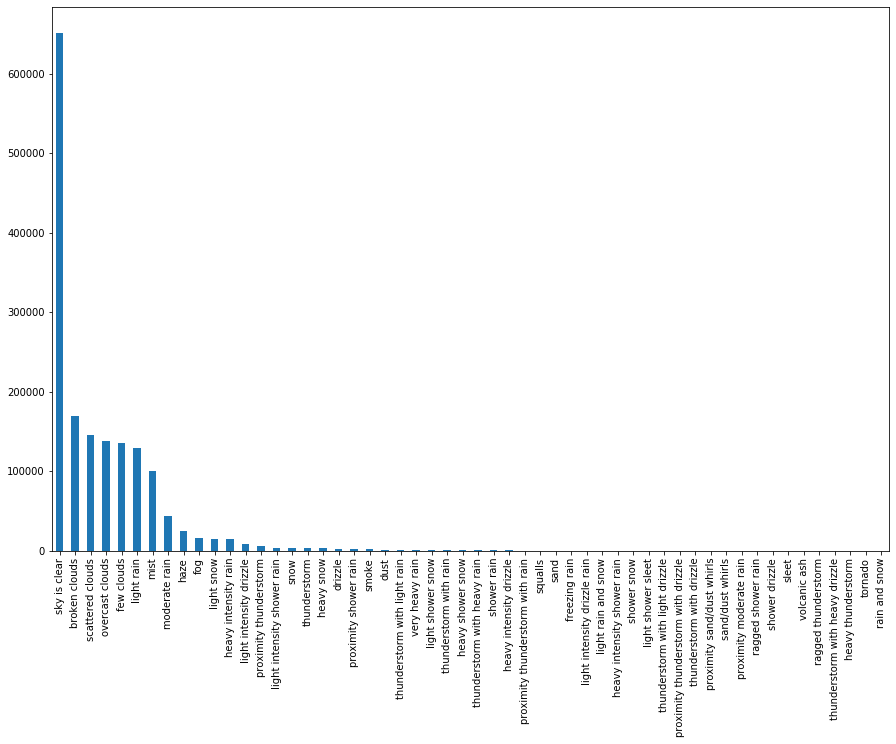

In [0]:
data["weather_description"].value_counts().plot(kind='bar')

In [0]:
data["weather_description"].value_counts().describe()

count        54.000000
mean      30021.351852
std       96396.436210
min           1.000000
25%          16.750000
50%         401.000000
75%        4990.500000
max      651226.000000
Name: weather_description, dtype: float64

In [0]:
data.weather_description.value_counts()


sky is clear                           651226
broken clouds                          169652
scattered clouds                       145290
overcast clouds                        137604
few clouds                             135187
light rain                             129248
mist                                    99624
moderate rain                           43531
haze                                    24506
fog                                     16444
light snow                              14385
heavy intensity rain                    14171
light intensity drizzle                  8122
proximity thunderstorm                   5364
light intensity shower rain              3870
snow                                     3188
thunderstorm                             3102
heavy snow                               2822
drizzle                                  2479
proximity shower rain                    2401
smoke                                    2064
dust                              

### City

In [0]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


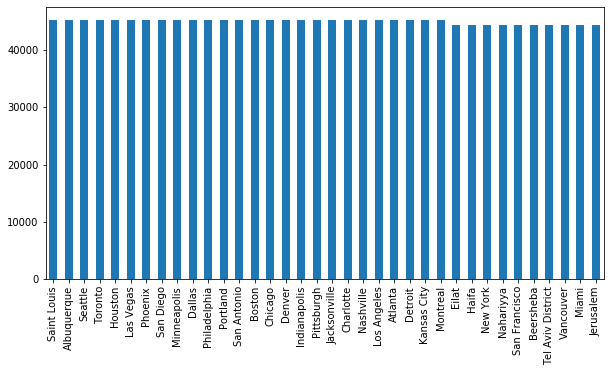

In [0]:
data["city"].value_counts().plot(kind='bar')

In [0]:
data.city.value_counts()

Saint Louis          45252
Albuquerque          45252
Seattle              45252
Toronto              45252
Houston              45252
Las Vegas            45252
Phoenix              45252
San Diego            45252
Minneapolis          45252
Dallas               45252
Philadelphia         45252
Portland             45252
San Antonio          45252
Boston               45252
Chicago              45252
Denver               45252
Indianapolis         45252
Pittsburgh           45252
Jacksonville         45252
Charlotte            45252
Nashville            45252
Los Angeles          45252
Atlanta              45252
Detroit              45252
Kansas City          45252
Montreal             45252
Eilat                44461
Haifa                44460
New York             44460
Nahariyya            44460
San Francisco        44460
Beersheba            44460
Tel Aviv District    44460
Vancouver            44460
Miami                44460
Jerusalem            44460
Name: city, dtype: int64

### Country

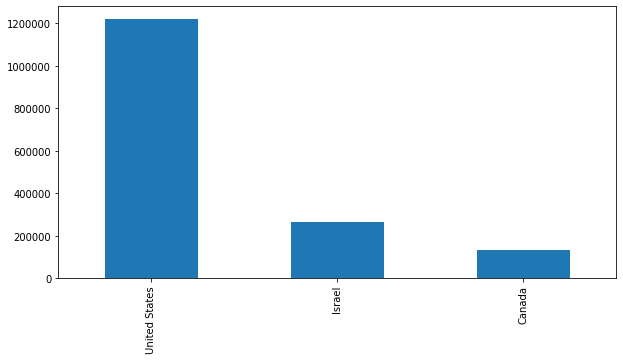

In [0]:
data["country"].value_counts().plot(kind='bar')

In [0]:
data.country.value_counts()

United States    1219428
Israel            266761
Canada            134964
Name: country, dtype: int64

### Humidity

In [0]:
data['humidity'].describe()

count    1.600457e+06
mean     6.813581e+01
std      2.244515e+01
min      5.000000e+00
25%      5.300000e+01
50%      7.200000e+01
75%      8.700000e+01
max      1.000000e+02
Name: humidity, dtype: float64

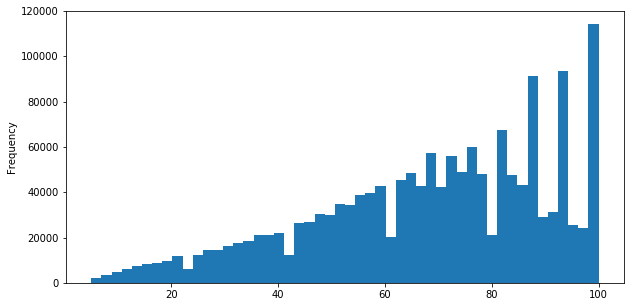

In [0]:
data['humidity'].plot.hist(bins=50)

### Pressure

In [0]:
data['pressure'].describe()

count    1.612428e+06
mean     1.016521e+03
std      1.556569e+01
min      8.000000e+02
25%      1.012000e+03
50%      1.017000e+03
75%      1.024000e+03
max      1.100000e+03
Name: pressure, dtype: float64

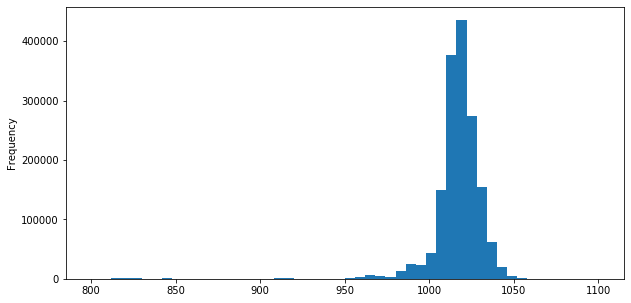

In [0]:
data['pressure'].plot.hist(bins=50)

### Temperature

In [0]:
data['temperature'].describe()

count    1.621078e+06
mean     2.885958e+02
std      1.035149e+01
min      2.423367e+02
25%      2.818840e+02
50%      2.895800e+02
75%      2.962500e+02
max      3.212200e+02
Name: temperature, dtype: float64

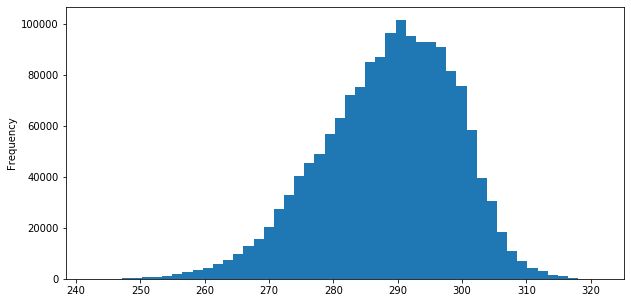

In [0]:
data['temperature'].plot.hist(bins=50)

### Wind_direction

In [0]:
data['wind_direction'].describe()

count    1.621133e+06
mean     1.829256e+02
std      1.060446e+02
min      0.000000e+00
25%      9.400000e+01
50%      1.900000e+02
75%      2.700000e+02
max      3.600000e+02
Name: wind_direction, dtype: float64

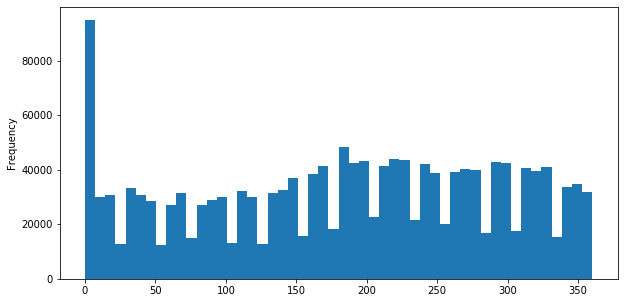

In [0]:
data['wind_direction'].plot.hist(bins=50)

### Wind_speed

In [0]:
data['wind_speed'].describe()

count    1.621115e+06
mean     2.790038e+00
std      2.092585e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.000000e+01
Name: wind_speed, dtype: float64

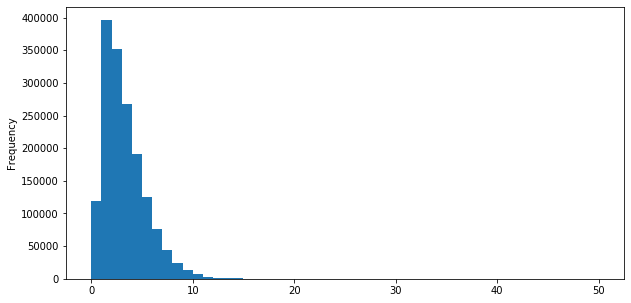

In [0]:
data['wind_speed'].plot.hist(bins=50)

## Cartogram test

In [0]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(cities).add_to(m)

#m.save('GeoJSON_and_choropleth_0.html')



In [142]:
colormap = linear.YlOrRd_05.scale(
    data.temperature.min(),
    data.temperature.max())
colormap.caption = 'temperature_aggregated'


print(colormap(5.0))
colormap

#ffffb2ff


In [0]:
data.temperature.mean

In [78]:
data.loc[data.city == 'Eilat'].temperature.min()

271.15

In [79]:
data.loc[data.city == 'Eilat'].temperature.max()

320.15

In [0]:
 Eilat_temp_avg =  data.loc[data.city == 'Eilat'].temperature.mean()

In [77]:
Eilat_temp_avg

296.4972759963348

In [0]:
group = data.groupby('city')

temp_agg = group.apply(lambda x: x['temperature'].mean())

In [104]:
temp_agg

city
Albuquerque          285.617856
Atlanta              289.772673
Beersheba            291.521986
Boston               283.779823
Charlotte            288.897483
Chicago              283.350573
Dallas               292.375872
Denver               282.839407
Detroit              282.971668
Eilat                296.497276
Haifa                295.266398
Houston              294.204268
Indianapolis         284.771904
Jacksonville         294.333380
Jerusalem            293.184253
Kansas City          286.641663
Las Vegas            292.424887
Los Angeles          290.846116
Miami                298.181274
Minneapolis          280.700489
Montreal             280.343010
Nahariyya            294.094803
Nashville            288.566306
New York             285.400406
Philadelphia         285.374168
Phoenix              295.493358
Pittsburgh           284.053939
Portland             284.992929
Saint Louis          286.675947
San Antonio          293.785646
San Diego            290.215044
San

In [0]:
df_temp_agg = temp_agg.apply(pd.Series)


In [0]:
df_temp_agg.reset_index(level=0, inplace=True)


In [129]:
df_temp_agg

,city,temperature_aggregated
0,Albuquerque,285.617856
1,Atlanta,289.772673
2,Beersheba,291.521986
3,Boston,283.779823
4,Charlotte,288.897483
5,Chicago,283.350573
6,Dallas,292.375872
7,Denver,282.839407
8,Detroit,282.971668
9,Eilat,296.497276


In [0]:
df_temp_agg.columns = ['city','temperature_aggregated']

In [0]:
df_temp_agg.insert(0, 'ID', range(0, len(df_temp_agg)))


In [117]:
df_temp_agg.set_index('ID')

,New_ID,temperature_aggregated
ID,,
0,0,285.617856
1,1,289.772673
2,2,291.521986
3,3,283.779823
4,4,288.897483
5,5,283.350573
6,6,292.375872
7,7,282.839407
8,8,282.971668


In [137]:
df_temp_agg

,city,temperature_aggregated
0,Albuquerque,285.617856
1,Atlanta,289.772673
2,Beersheba,291.521986
3,Boston,283.779823
4,Charlotte,288.897483
5,Chicago,283.350573
6,Dallas,292.375872
7,Denver,282.839407
8,Detroit,282.971668
9,Eilat,296.497276


In [0]:
#df_temp_agg = df_temp_agg.to_frame()
df_temp_agg.columns = ['city']
df_temp_agg

In [144]:
df_temp_agg

,city,temperature_aggregated
0,Albuquerque,285.617856
1,Atlanta,289.772673
2,Beersheba,291.521986
3,Boston,283.779823
4,Charlotte,288.897483
5,Chicago,283.350573
6,Dallas,292.375872
7,Denver,282.839407
8,Detroit,282.971668
9,Eilat,296.497276


In [0]:
df_temp_agg_dict = df_temp_agg.set_index('city')['temperature_aggregated']


In [136]:
df_temp_agg_dict

city
Albuquerque          285.617856
Atlanta              289.772673
Beersheba            291.521986
Boston               283.779823
Charlotte            288.897483
Chicago              283.350573
Dallas               292.375872
Denver               282.839407
Detroit              282.971668
Eilat                296.497276
Haifa                295.266398
Houston              294.204268
Indianapolis         284.771904
Jacksonville         294.333380
Jerusalem            293.184253
Kansas City          286.641663
Las Vegas            292.424887
Los Angeles          290.846116
Miami                298.181274
Minneapolis          280.700489
Montreal             280.343010
Nahariyya            294.094803
Nashville            288.566306
New York             285.400406
Philadelphia         285.374168
Phoenix              295.493358
Pittsburgh           284.053939
Portland             284.992929
Saint Louis          286.675947
San Antonio          293.785646
San Diego            290.215044
San

In [0]:
df_temp_agg

In [143]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    cities,
    name='temperature',
    style_function=lambda feature: {
        'fillColor': colormap(df_temp_agg_dict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.LayerControl().add_to(m)

#m.save('GeoJSON_and_choropleth_5.html')

m

In [159]:
m = folium.Map([43, -100], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=cities,
    data=df_temp_agg_dict,
    columns=['city', 'temperature_aggregated'],
    key_on='feature.id',
    fill_color='OrRd',
    name='temperature_aggregated',
    show=False,
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachable
print(type(choropleth.geojson))
print(type(choropleth.color_scale))

folium.LayerControl(collapsed=True).add_to(m)

m.save('GeoJSON_and_choropleth_final.html')

m

<class 'folium.features.GeoJson'>
<class 'branca.colormap.StepColormap'>


In [0]:
temperature_dict = data.set_index('State')['Unemployment']


In [73]:
linear

Output hidden; open in https://colab.research.google.com to view.

In [0]:

 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('/Users/Marek/OneDrive/FIIT_LS_2020/VD', 'us_states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = os.path.join('/Users/Marek/OneDrive/FIIT_LS_2020/VD', 'US_Unemployment_Oct2012.csv')
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')


FileNotFoundError: ignored